# Identifying Arctic Biological activities through gridded data 

In [1]:
import sys
sys.path.insert(0, '../../_libs/')

In [70]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, cm
% matplotlib inline

**data**: World Ocean Atlas [https://www.nodc.noaa.gov/OC5/woa13/woa13data.html];

**vars**: Winter/Summer climatology of Nitrate as netCDF4, 180\*360\*37;

**Why**: The Arctic primary production is limited by Nitrate [Michel et al., 2015].

Michel, C. et al., 2015. Arctic Ocean outflow shelves in the changing Arctic: A review and perspectives. *Prog. Oceanogr.* 139, 66–88.

In [9]:
names = glob.glob('../../_data/Reanalysis/WOA/*nc')

In [58]:
JJA_obj = nc.Dataset(names[0])
JJA_NO3 = JJA_obj.variables['n_an'][0, :21, :, :]
JJA_NO3[JJA_NO3>100]=np.nan;# JJA_NO3[JJA_NO3<0]=np.nan

DJF_obj = nc.Dataset(names[1])
DJF_NO3 = DJF_obj.variables['n_an'][0, :21, :, :]
DJF_NO3[DJF_NO3>100]=np.nan;# DJF_NO3[JJA_NO3<0]=np.nan

In [60]:
x = JJA_obj.variables['lon']
y = JJA_obj.variables['lat']
z = JJA_obj.variables['depth']

JJA_NO3, new_x = addcyclic(JJA_NO3, x)
DJF_NO3, _ = addcyclic(DJF_NO3, x)

longitude, latitude = np.meshgrid(new_x, y)

**the Arctic Ocean**

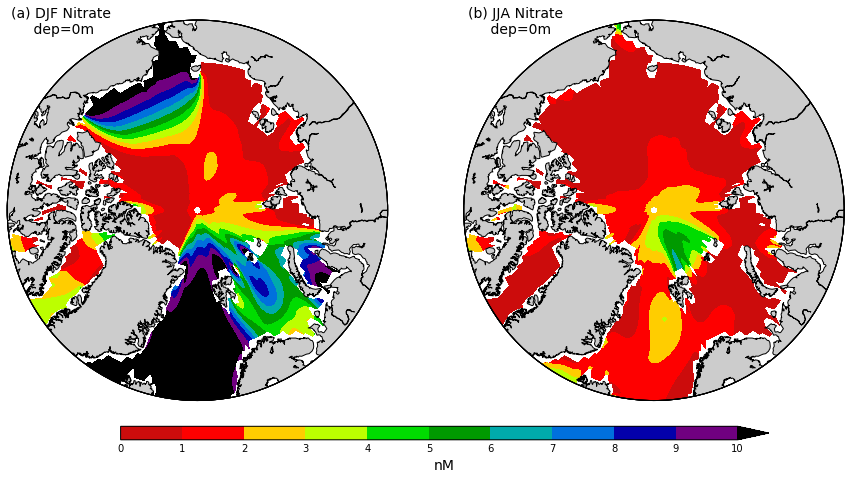

In [99]:
lev = np.arange(0, 11, 1)

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj = Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax1)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=1.0, color='k')
xgrid, ygrid = proj(longitude, latitude)
CS = proj.contourf(xgrid, ygrid, DJF_NO3[0, :, :], lev, extend='max', cmap=plt.cm.nipy_spectral_r)

proj = Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax2)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=1.0, color='k')
xgrid, ygrid = proj(longitude, latitude)
CS = proj.contourf(xgrid, ygrid, JJA_NO3[0, :, :], lev, extend='max', cmap=plt.cm.nipy_spectral_r)

ax1.set_title('(a) DJF Nitrate\n     dep=0m', fontsize=14, loc='left', y=0.95, x=0.01)
ax2.set_title('(b) JJA Nitrate\n     dep=0m', fontsize=14, loc='left', y=0.95, x=0.01)

cax  = fig.add_axes([0.23, 0.3, 0.6, 0.0125])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=14)
CBar.ax.tick_params(axis='x', length=0, direction='in')
CBar.set_ticks(lev)

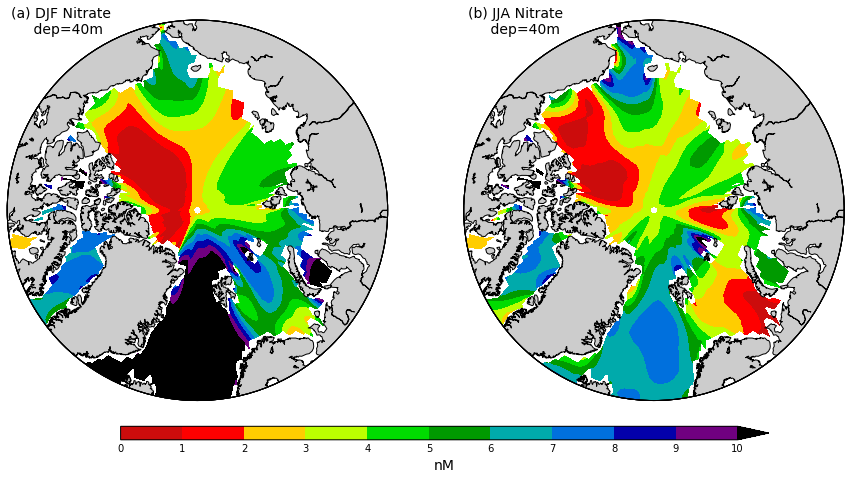

In [100]:
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj = Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax1)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=1.0, color='k')
xgrid, ygrid = proj(longitude, latitude)
CS = proj.contourf(xgrid, ygrid, DJF_NO3[8, :, :], lev, extend='max', cmap=plt.cm.nipy_spectral_r)

proj = Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax2)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=1.0, color='k')
xgrid, ygrid = proj(longitude, latitude)
CS = proj.contourf(xgrid, ygrid, JJA_NO3[8, :, :], lev, extend='max', cmap=plt.cm.nipy_spectral_r)

ax1.set_title('(a) DJF Nitrate\n     dep=40m', fontsize=14, loc='left', y=0.95, x=0.01)
ax2.set_title('(b) JJA Nitrate\n     dep=40m', fontsize=14, loc='left', y=0.95, x=0.01)

cax  = fig.add_axes([0.23, 0.3, 0.6, 0.0125])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=14)
CBar.ax.tick_params(axis='x', length=0, direction='in')
CBar.set_ticks(lev)

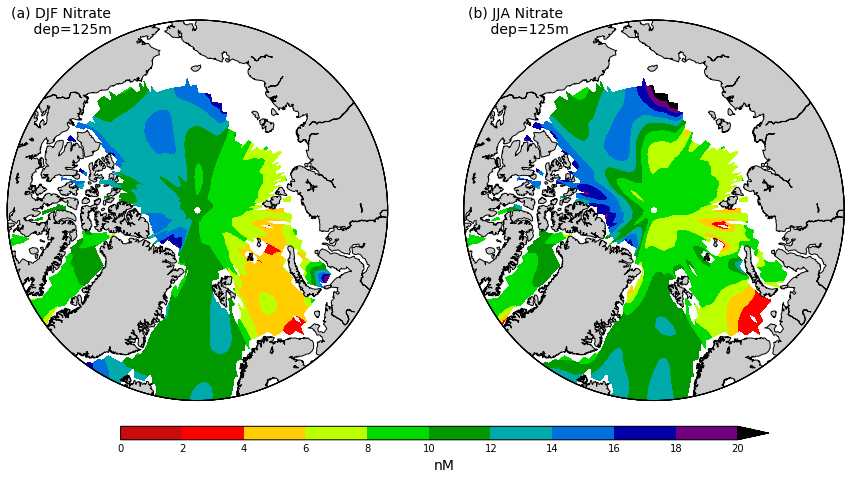

In [98]:
lev = np.arange(0, 22, 2)

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj = Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax1)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=1.0, color='k')
xgrid, ygrid = proj(longitude, latitude)
CS = proj.contourf(xgrid, ygrid, DJF_NO3[-1, :, :], lev, extend='max', cmap=plt.cm.nipy_spectral_r)

proj = Basemap(projection='npstere', resolution='l', boundinglat=65, lon_0=0, round=True, ax=ax2)
proj.fillcontinents(color='0.8', lake_color=None)
proj.drawcoastlines(linewidth=1.0, color='k')
xgrid, ygrid = proj(longitude, latitude)
CS = proj.contourf(xgrid, ygrid, JJA_NO3[-1, :, :], lev, extend='max', cmap=plt.cm.nipy_spectral_r)

ax1.set_title('(a) DJF Nitrate\n     dep=125m', fontsize=14, loc='left', y=0.95, x=0.01)
ax2.set_title('(b) JJA Nitrate\n     dep=125m', fontsize=14, loc='left', y=0.95, x=0.01)

cax  = fig.add_axes([0.23, 0.3, 0.6, 0.0125])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=14)
CBar.ax.tick_params(axis='x', length=0, direction='in')
CBar.set_ticks(lev)